<a href="https://www.kaggle.com/code/sanjayrk/customer-churn-prediction-an-end-to-end-ml-workfl?scriptVersionId=288381166" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head(3))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  E

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
!pip install ydata-profiling

In [5]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title="Customer Churn Prediction",explorative=True)
profile.to_file("churn_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 28.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.drop(columns=["customerID"],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    style="ticks",
    palette="muted",
    context="notebook"
)

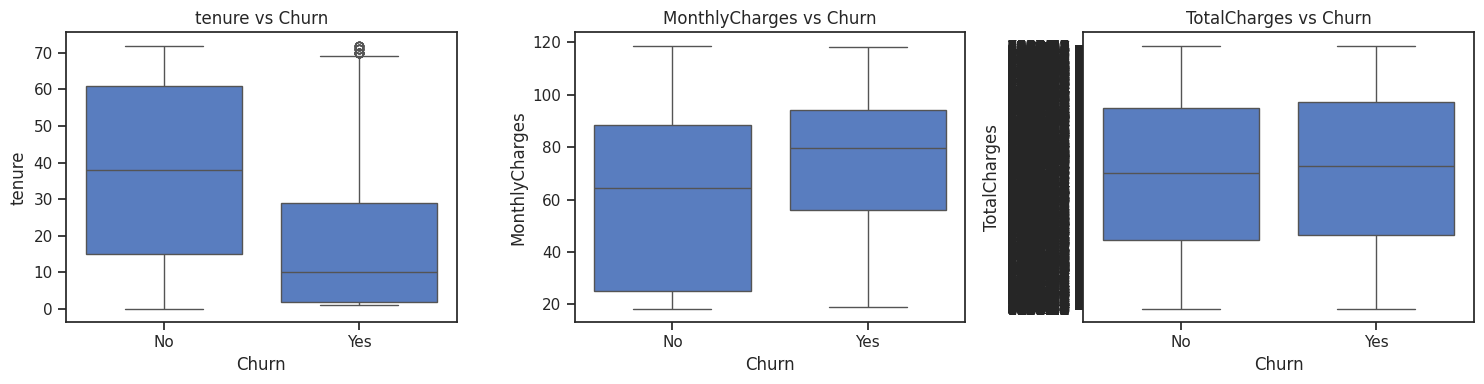

In [10]:
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(num_features):
    sns.boxplot(x="Churn", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


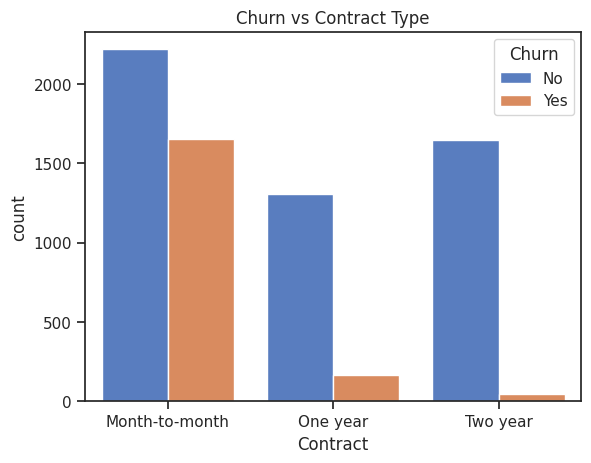

In [11]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn vs Contract Type")
plt.show()


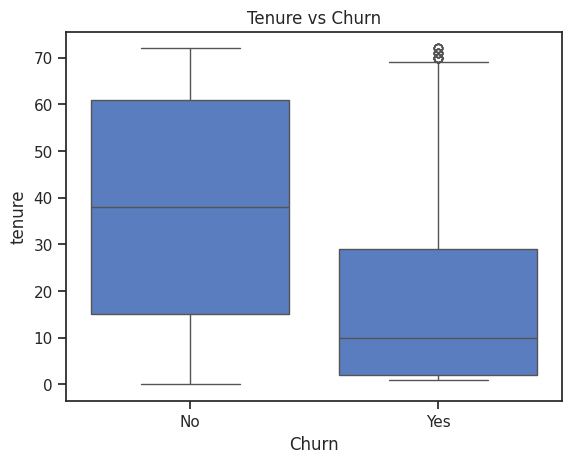

In [12]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


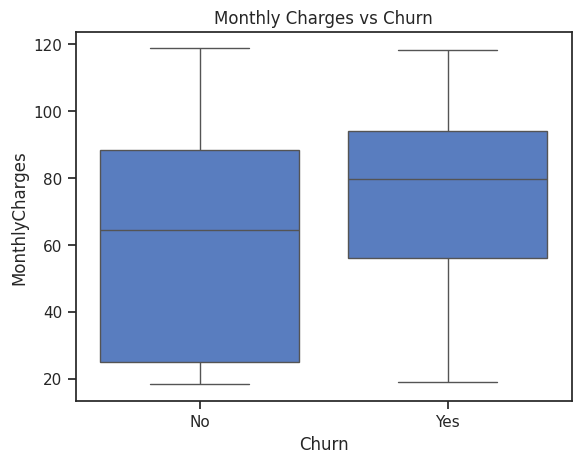

In [13]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [14]:
df['TotalCharges']=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
df["TotalCharges"].isna().sum()


np.int64(11)

In [17]:
df.fillna({"TotalCharges":0}, inplace=True)


In [18]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [19]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

numeric_cols.remove("Churn")


In [20]:
print(categorical_cols)
print(numeric_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [21]:
df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)
df_encoded.shape

(7043, 31)

In [22]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score,roc_auc_score,f1_score, accuracy_score, classification_report,accuracy_score

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5634, 30), (1409, 30), (5634,), (1409,))

In [26]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression(max_iter=1000,class_weight="balanced",random_state=42)
model_1.fit(X_train_scaled,y_train)

y_pred=model_1.predict(X_test_scaled)
y_pred_proba=model_1.predict_proba(X_test_scaled)[:,1]

In [28]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred_proba)

print("ROC_AUC:",roc_auc)



ROC_AUC: 0.8414012245214291


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



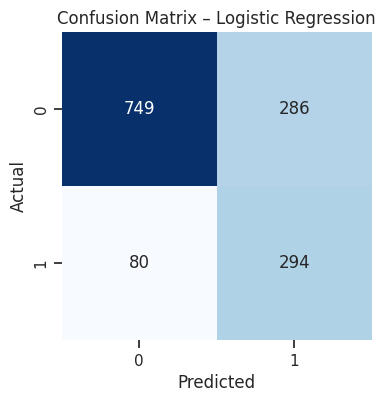

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


In [31]:
weights = pd.Series(model_1.coef_[0], index=X.columns.values)
print("\n--- Top 10 Features Increasing Churn Risk ---")
print(weights.sort_values(ascending=False).head(10))

print("\n--- Top 10 Features Reducing Churn Risk ---")
print(weights.sort_values(ascending=True).head(10))


--- Top 10 Features Increasing Churn Risk ---
InternetService_Fiber optic       0.808897
TotalCharges                      0.494748
StreamingMovies_Yes               0.285948
StreamingTV_Yes                   0.273209
MultipleLines_Yes                 0.201165
PaymentMethod_Electronic check    0.188783
PaperlessBilling_Yes              0.164703
DeviceProtection_Yes              0.058287
SeniorCitizen                     0.056636
PhoneService_Yes                  0.024336
dtype: float64

--- Top 10 Features Reducing Churn Risk ---
tenure                                 -1.159048
MonthlyCharges                         -1.039440
Contract_Two year                      -0.617746
Contract_One year                      -0.296706
OnlineSecurity_Yes                     -0.114503
Dependents_Yes                         -0.104292
OnlineBackup_No internet service       -0.099096
OnlineSecurity_No internet service     -0.099096
TechSupport_No internet service        -0.099096
DeviceProtection_No in

In [32]:
model_b = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=0.1,
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

model_b.fit(X_train_scaled, y_train)

y_pred_b = model_b.predict(X_test_scaled)
y_pred_proba_b = model_b.predict_proba(X_test_scaled)[:, 1]

print("=== Model B : L1 Logistic Regression ===")
print(classification_report(y_test, y_pred_b))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_b))

weights_b = pd.Series(model_b.coef_[0], index=X.columns)
print("\n--- Top 10 Features Increasing Churn Risk (Model B) ---")
print(weights_b.sort_values(ascending=False).head(10))

print("\n--- Top 10 Features Reducing Churn Risk (Model B) ---")
print(weights_b.sort_values().head(10))

=== Model B : L1 Logistic Regression ===
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8404066237825828

--- Top 10 Features Increasing Churn Risk (Model B) ---
InternetService_Fiber optic       0.420824
PaymentMethod_Electronic check    0.180330
PaperlessBilling_Yes              0.157938
TotalCharges                      0.142187
StreamingMovies_Yes               0.127405
StreamingTV_Yes                   0.115911
MultipleLines_No phone service    0.113451
MultipleLines_Yes                 0.112494
SeniorCitizen                     0.052861
gender_Male                       0.006819
dtype: float64

--- Top 10 Features Reducing Churn Risk (Model B) ---
tenure                                  -0.8562

In [33]:
from sklearn.feature_selection import RFE

base_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

rfe = RFE(
    estimator=base_model,
    n_features_to_select=15
)

rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)

X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

scaler_rfe = StandardScaler()
X_train_rfe_scaled = scaler_rfe.fit_transform(X_train_rfe)
X_test_rfe_scaled = scaler_rfe.transform(X_test_rfe)

model_c = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

model_c.fit(X_train_rfe_scaled, y_train)

y_pred_c = model_c.predict(X_test_rfe_scaled)
y_pred_proba_c = model_c.predict_proba(X_test_rfe_scaled)[:, 1]

print("\n=== Model C : RFE + Logistic Regression ===")
print(classification_report(y_test, y_pred_c))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_c))

weights_c = pd.Series(model_c.coef_[0], index=selected_features)
print("\n--- Top Features Increasing Churn Risk (Model C) ---")
print(weights_c.sort_values(ascending=False).head(10))

print("\n--- Top Features Reducing Churn Risk (Model C) ---")
print(weights_c.sort_values().head(10))


Selected Features by RFE:
Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype='object')

=== Model C : RFE + Logistic Regression ===
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409

ROC-AUC: 0.8406920871115244

--- Top Features Increasing Churn Risk (Model C) ---
InternetService_Fiber optic            0.913305
TotalCharges        

In [34]:
y_train_proba = model_b.predict_proba(X_train_scaled)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_train_proba)
y_test_proba = model_b.predict_proba(X_test_scaled)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)

print("Train ROC-AUC:", roc_auc_train)
print("Test ROC-AUC :", roc_auc_test)


Train ROC-AUC: 0.8480454700818787
Test ROC-AUC : 0.8404066237825828


In [35]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=50,
    class_weight="balanced",
    random_state=42
)

model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
y_pred_2_proba = model_2.predict_proba(X_test)[:, 1]

roc_auc_2 = roc_auc_score(y_test, y_pred_2_proba)
print("Decision Tree ROC-AUC:", roc_auc_2)

print(classification_report(y_test, y_pred_2))



Decision Tree ROC-AUC: 0.8302087369862304
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.81      0.62       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409



In [36]:
df["AvgCharges"] = df["TotalCharges"] / (df["tenure"] + 1)
df.drop(columns=["TotalCharges"], inplace=True)
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [37]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report

dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=100,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_proba = dt.predict_proba(X_test)[:, 1]

print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_pred_dt_proba))
print(classification_report(y_test, y_pred_dt))


Decision Tree ROC-AUC: 0.8343266423829083
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression
log_reg_l1 = LogisticRegression(class_weight="balanced",max_iter=1000,penalty="l1",random_state=42,solver="liblinear")

log_reg_l1.fit(X_train_scaled, y_train)
y_pred = log_reg_l1.predict(X_test_scaled)
y_pred_proba = log_reg_l1.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC(Logistic Regression):", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))


ROC-AUC(Logistic Regression): 0.8442894417318969
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300,max_depth=8,min_samples_leaf=50,class_weight="balanced",random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

print("ROC-AUC (Random Forest):", roc_auc_score(y_test, y_pred_rf_proba))
print("Classification Report(Random Forest):")
print(classification_report(y_test, y_pred_rf))

ROC-AUC (Random Forest): 0.8427471647420497
Classification Report(Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [42]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=400,max_depth=4,learning_rate=0.05,subsample=0.8,colsample_bytree=0.8,eval_metric="logloss",random_state=42)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_proba = xgb.predict_proba(X_test)[:, 1]
print("ROC-AUC (XGBoost):", roc_auc_score(y_test, y_pred_xgb_proba))
print("Classification Report(XGBoost):")
print(classification_report(y_test, y_pred_xgb))


ROC-AUC (XGBoost): 0.8389599317988065
Classification Report(XGBoost):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [43]:
comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression (L1)",
        "Decision Tree",
        "Random Forest",
        "XGBoost"
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_pred_proba),
        roc_auc_score(y_test, y_pred_dt_proba),
        roc_auc_score(y_test, y_pred_rf_proba),
        roc_auc_score(y_test, y_pred_xgb_proba)
    ]
})

comparison


,Model,ROC-AUC
0,Logistic Regression (L1),0.844289
1,Decision Tree,0.834327
2,Random Forest,0.842747
3,XGBoost,0.838960


***✅ Conclusion & Key Takeaways***

***📊 Model Performance Summary***

All four models were evaluated using ROC-AUC, which is well-suited for churn prediction due to class imbalance and its ability to measure ranking performance across all thresholds.


**🏆 Final Model Selection**

Despite experimenting with advanced tree-based and boosting models, Logistic Regression with L1 regularization achieved the highest ROC-AUC while maintaining strong recall for churn and excellent interpretability.
This indicates that:

* Churn patterns in the dataset are largely linear
* Careful feature engineering and preprocessing captured most of the predictive signal
* Increased model complexity did not yield significant 


**As a result, Logistic Regression was selected as the final model due to its balance of performance, stability, and explainability.**


In [44]:
coef = log_reg_l1.coef_[0]
features = X_train.columns

coef_df = pd.DataFrame({
    "feature": features,
    "coefficient": coef
})


idx = np.argmax(y_pred_proba)
customer = X_test.iloc[idx]

contrib_df = coef_df.copy()
contrib_df["value"] = customer.values
contrib_df["contribution"] = contrib_df["value"] * contrib_df["coefficient"]

contrib_df.sort_values("contribution", ascending=False).head(10)


,feature,coefficient,value,contribution
10,InternetService_Fiber optic,0.867128,True,0.867128
23,StreamingMovies_Yes,0.335225,True,0.335225
21,StreamingTV_Yes,0.320398,True,0.320398
9,MultipleLines_Yes,0.252159,True,0.252159
28,PaymentMethod_Electronic check,0.173189,True,0.173189
26,PaperlessBilling_Yes,0.161804,True,0.161804
0,SeniorCitizen,0.052373,1,0.052373
7,PhoneService_Yes,0.049194,True,0.049194
5,Partner_Yes,0.019828,True,0.019828
4,gender_Male,0.018625,True,0.018625


In [45]:
impact_df = coef_df.copy()
impact_df["abs_coef"] = impact_df["coefficient"].abs()

impact_df = impact_df.sort_values("abs_coef", ascending=False)

impact_df.head(10)


,feature,coefficient,abs_coef
3,AvgCharges,-1.149604,1.149604
10,InternetService_Fiber optic,0.867128,0.867128
25,Contract_Two year,-0.707042,0.707042
1,tenure,-0.500137,0.500137
14,OnlineBackup_No internet service,-0.471151,0.471151
23,StreamingMovies_Yes,0.335225,0.335225
21,StreamingTV_Yes,0.320398,0.320398
24,Contract_One year,-0.313691,0.313691
9,MultipleLines_Yes,0.252159,0.252159
28,PaymentMethod_Electronic check,0.173189,0.173189


In [46]:

results_df = X_test.copy()
results_df["churn_probability"] = y_pred_proba

results_df["risk_bucket"] = pd.cut(
    results_df["churn_probability"],
    bins=[0, 0.3, 0.6, 1.0],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

results_df["risk_bucket"].value_counts()


risk_bucket
Low Risk       603
High Risk      475
Medium Risk    331
Name: count, dtype: int64

In [47]:
high_risk_profile = (
    results_df[results_df["risk_bucket"] == "High Risk"]
    .mean(numeric_only=True)
)

high_risk_profile[["tenure", "AvgCharges"]]




tenure        14.461053
AvgCharges    64.752010
dtype: float64

In [48]:
low_risk_profile = (
    results_df[results_df["risk_bucket"] == "Low Risk"]
    .mean(numeric_only=True)
)

low_risk_profile[["tenure", "AvgCharges"]]


tenure        48.507463
AvgCharges    53.201519
dtype: float64

In [49]:
driver_df = coef_df.copy()
driver_df["abs_coef"] = driver_df["coefficient"].abs()

top_drivers = driver_df.sort_values("abs_coef", ascending=False).head(10)
top_drivers


,feature,coefficient,abs_coef
3,AvgCharges,-1.149604,1.149604
10,InternetService_Fiber optic,0.867128,0.867128
25,Contract_Two year,-0.707042,0.707042
1,tenure,-0.500137,0.500137
14,OnlineBackup_No internet service,-0.471151,0.471151
23,StreamingMovies_Yes,0.335225,0.335225
21,StreamingTV_Yes,0.320398,0.320398
24,Contract_One year,-0.313691,0.313691
9,MultipleLines_Yes,0.252159,0.252159
28,PaymentMethod_Electronic check,0.173189,0.173189


In [50]:
recommendations = pd.DataFrame({
    "Model-Identified Driver": [
        "High Average Monthly Charges",
        "Short Contract Duration (Month-to-Month)",
        "Low Customer Tenure",
        "Fiber Optic Internet Service",
        "Streaming Add-ons (TV / Movies)",
        "Multiple Phone Lines",
        "Electronic Check Payment Method"
    ],
    
    "What the Model Shows": [
        "Strongest factor increasing churn risk",
        "Lack of commitment increases churn",
        "New customers are more likely to churn",
        "Fiber users have significantly higher churn",
        "Bundled services increase price sensitivity",
        "Complex plans increase dissatisfaction",
        "Higher churn compared to auto-pay or card payments"
    ],
    
    "Business Recommendation": [
        "Introduce targeted discounts or loyalty pricing to reduce monthly costs",
        "Incentivize customers to move to 1-year or 2-year contracts",
        "Improve onboarding and early engagement for new customers",
        "Provide proactive support and service quality checks for fiber users",
        "Offer simplified or discounted streaming bundles",
        "Simplify multi-line plans and provide dedicated support",
        "Encourage auto-pay or card payments through small incentives"
    ]
})

recommendations



,Model-Identified Driver,What the Model Shows,Business Recommendation
0,High Average Monthly Charges,Strongest factor increasing churn risk,Introduce targeted discounts or loyalty pricin...
1,Short Contract Duration (Month-to-Month),Lack of commitment increases churn,Incentivize customers to move to 1-year or 2-y...
2,Low Customer Tenure,New customers are more likely to churn,Improve onboarding and early engagement for ne...
3,Fiber Optic Internet Service,Fiber users have significantly higher churn,Provide proactive support and service quality ...
4,Streaming Add-ons (TV / Movies),Bundled services increase price sensitivity,Offer simplified or discounted streaming bundles
5,Multiple Phone Lines,Complex plans increase dissatisfaction,Simplify multi-line plans and provide dedicate...
6,Electronic Check Payment Method,Higher churn compared to auto-pay or card paym...,Encourage auto-pay or card payments through sm...
